In [583]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [570]:
df = pd.read_csv('../dataset/updated_ds_jobs_2021.csv')

What we will do

- Choose relevant columns
- Get dummy data
- Train - Test split
- Test various types of models
    - Multiple Linear Regression
    - Lasso Regression
    - Random Forest
    - Gradiant Booster Tree
    - Support Vector Regression
- Tune the Models using GridsearchCV
- Test Ensembles

In [571]:
df.columns

Index(['job_title', 'seniority', 'job_title_sim', 'job_description', 'python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'higher_degree', 'higher_degree_needed', 'avg_salary_hour',
       'avg_salary_month', 'avg_salary_year', 'employer_provided',
       'job_location', 'job_location_city', 'company', 'company_headquarters',
       'company_headquarters_city', 'same_place', 'rating',
       'number_of_workers', 'revenue(USD)', 'founded', 'type_of_ownership',
       'industry', 'sector', 'age', 'competitors', 'number_competitors'],
      dtype='object')

In [572]:
#choosing relevant columns
df_model = df[['avg_salary_hour','rating', 'number_of_workers', 'type_of_ownership', 'revenue(USD)', 'number_competitors', 'employer_provided', 'same_place', 'age', 'python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority', 'sector']]

deram errado: 'industry', 'job_location',

In [573]:
#getting dummy data
df_dum = pd.get_dummies(df_model)
df_dum

,avg_salary_hour,rating,number_competitors,employer_provided,same_place,age,python,spark,aws,excel,...,sector_Media,sector_Mining & Metals,sector_No Data,sector_Non-Profit,"sector_Oil, Gas, Energy & Utilities",sector_Real Estate,sector_Retail,sector_Telecommunications,sector_Transportation & Logistics,sector_Travel & Tourism
0,34.62,3.8,0,0,0,48,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42.07,3.4,0,0,0,37,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.87,4.8,0,0,1,11,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36.78,3.8,3,0,1,56,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,55.05,2.9,3,0,1,23,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,40.62,3.9,3,0,0,191,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
718,49.28,4.4,3,0,0,15,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
719,35.34,2.6,0,0,1,37,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
720,61.30,3.2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [574]:
#Train - Test split
X = df_dum.drop('avg_salary_hour', axis = 1)
y = df_dum.avg_salary_hour.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [575]:
#Multiple Linear Regression
#statsmodel
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     8.362
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.62e-59
Time:                        16:46:42   Log-Likelihood:                -2837.1
No. Observations:                 722   AIC:                             5838.
Df Residuals:                     640   BIC:                             6214.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               21.1907      3.105      6.824      0.000      15.093      27.289
rating                                               0.5845      1.057      0.553      0.581      -1.492       2.661
number_competitors                                   0.4411      0.442      0.997      0.319      -0.427       1.310
employer_provided                                   16.4068      7.363      2.228      0.026       1.947      30.866
same_place                                           3.5125      1.202      2.922      0.004       1.152       5.873
age                                                  0.0074      0.015      0.508      0.612      -0.021       0.036
python                                               3.8563      1.368      2.819      0.005       1.170       6.543
spark                                               -1.1813      1.780     -0.663      0.507      -4.678       2.315
aws                                                  1.6197      1.412      1.147      0.252      -1.153       4.392
excel                                               -0.8733      1.133     -0.771      0.441      -3.097       1.351
sql                                                 -2.5683      1.437     -1.787      0.074      -5.390       0.254
sas                                                  7.0302      2.061      3.410      0.001       2.982      11.078
keras                                                4.5687      3.606      1.267      0.206      -2.513      11.651
pytorch                                             -9.0332      3.207     -2.817      0.005     -15.331      -2.735
scikit                                              -0.5432      2.660     -0.204      0.838      -5.766       4.680
tensor                                               6.1432      2.908      2.112      0.035       0.432      11.854
hadoop                                               0.1846      1.793      0.103      0.918      -3.336       3.705
tableau                                             -0.8147      1.723     -0.473      0.636      -4.198       2.568
bi                                                   0.0544      2.382      0.023      0.982      -4.624       4.732
flink                                                5.3407      4.729      1.129      0.259      -3.946      14.627
mongo                                                5.6068      2.682      2.090      0.037       0.339      10.874
google_an                                           -2.4868      4.972     -0.500      0.617     -12.251       7.277
number_of_workers_1 - 50                             3.3504      2.972      1.127      0.260      -2.485       9.186
number_of_workers_10000+                 

There is alot of Multicollinearity  in this data (occurs when two or more independent variables have a high correlation with one another in a regression model)m so this first model will serve more of a analysis.


Our model explains arround 68.9% in the variotion of the monthly salaries (R-squared)
P values less than 0.05 means they are significant in our model. When a p-value is reported as p = 0.000, the actual p-value is too small for the software to display 

- For each additional Rating, we have +403.36 dollars monthly in the salary
- For each additional number of competitor, it adds 183 dollars monthly in the salary
- Some skills appear to have value in the salary, some appear to not impact it at all
- Some industries are more likely to pay more money than others, others pay less
- Same for all categories


Put more insights here

In [576]:
#sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-10.346365354566595

neg_mean_absolute_error -> how far we are on average from our general prediction

10,346 = 10.346 dollars

,alpha,error
3,0.04,-9.942662


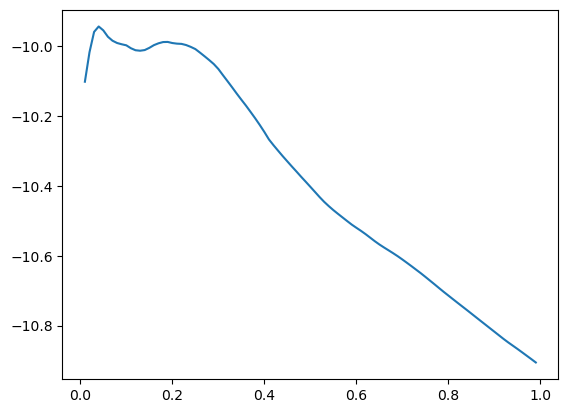

In [577]:
#lasso regretion 
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


The model was improved a little (-10.346365354566595 using sklearn and -9.942662 using lasso regression)

In [578]:
# random forest 
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-7.217418621197758

The model was improved even more (-9.942662 using lasso regression and -7.412864318133042 using Random Forest) 

In [579]:
# tune models GridsearchCV 
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)


c:\Users\flpro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
261 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\flpro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\flpro\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\flpro\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\flpro\anaconda3\lib\site-packag

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [580]:
gs.best_score_

-7.07294133701759

In [581]:

gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=280)

The model was improved again(-7.412864318133042 using Random Forest and -7.07294133701759 with Grid Search)

CONTINUAR DAQUI COM OUTROS MODELOS (olhar os que estao la em cima)
DESCOBRIR COMO INCLUIR AS COLUNAS QUE NAO FUNCIONARAM

In [589]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

#lm
mean_absolute_error(y_test,tpred_lm)

11.991045423536601

In [591]:
#lml
mean_absolute_error(y_test,tpred_lml)

12.84449512242528

In [592]:
#random forest
mean_absolute_error(y_test,tpred_rf)


8.2016657635468

In [594]:
#combining two models
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)


10.405967196845465

In [595]:
#combining two models
mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)


10.405967196845465

In [596]:
#combining two models
mean_absolute_error(y_test,(tpred_lml+tpred_lm)/2)

12.221587473991336